In [ ]:
import tensorflow_datasets as tfds
import pandas as pd

dataset = tfds.load('wine_quality', split='train')

df = tfds.as_dataframe(dataset)
df.columns = [col.replace('features/', '') for col in df.columns]

df.head()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/wine_quality/white/1.0.0.incompleteXYHD3X/wine_quality-train.tfrecord*...:…

Dataset wine_quality downloaded and prepared to /root/tensorflow_datasets/wine_quality/white/1.0.0. Subsequent calls will reuse this data.


,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


# New Section

In [ ]:
print(df.shape)

(4898, 12)


In [ ]:
print(df.dtypes)


alcohol                 float32
chlorides               float32
citric acid             float32
density                 float32
fixed acidity           float32
free sulfur dioxide     float32
pH                      float32
residual sugar          float32
sulphates               float64
total sulfur dioxide    float32
volatile acidity        float32
quality                   int32
dtype: object


In [ ]:
print(df.isnull().sum())


alcohol                 0
chlorides               0
citric acid             0
density                 0
fixed acidity           0
free sulfur dioxide     0
pH                      0
residual sugar          0
sulphates               0
total sulfur dioxide    0
volatile acidity        0
quality                 0
dtype: int64


In [ ]:
df.describe()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,10.514268,0.045772,0.334192,0.994027,6.854788,35.308086,3.188267,6.391415,0.489847,138.360657,0.278241,5.877909
std,1.230621,0.021848,0.121020,0.002991,0.843868,17.007137,0.151001,5.072058,0.114126,42.498066,0.100795,0.885639
min,8.000000,0.009000,0.000000,0.987110,3.800000,2.000000,2.720000,0.600000,0.220000,9.000000,0.080000,3.000000
25%,9.500000,0.036000,0.270000,0.991723,6.300000,23.000000,3.090000,1.700000,0.410000,108.000000,0.210000,5.000000
50%,10.400000,0.043000,0.320000,0.993740,6.800000,34.000000,3.180000,5.200000,0.470000,134.000000,0.260000,6.000000
75%,11.400000,0.050000,0.390000,0.996100,7.300000,46.000000,3.280000,9.900000,0.550000,167.000000,0.320000,6.000000
max,14.200000,0.346000,1.660000,1.038980,14.200000,289.000000,3.820000,65.800003,1.080000,440.000000,1.100000,9.000000


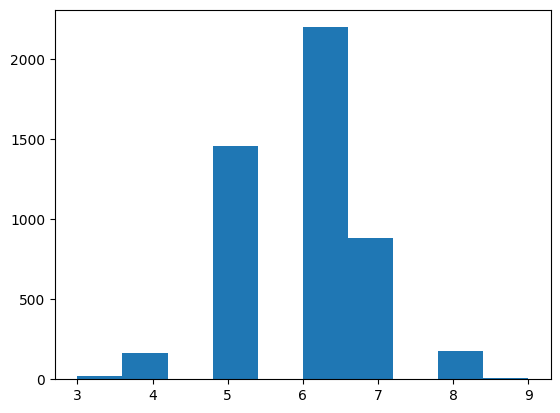

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['quality'])
plt.show()

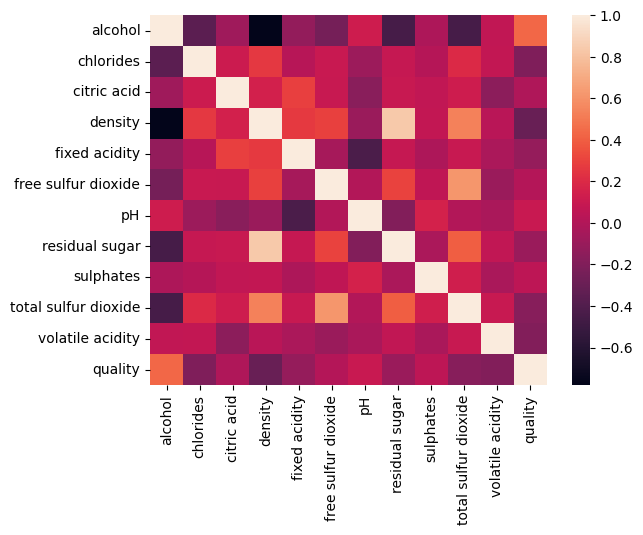

In [ ]:
import seaborn as sns

sns.heatmap(df.corr())
plt.show()


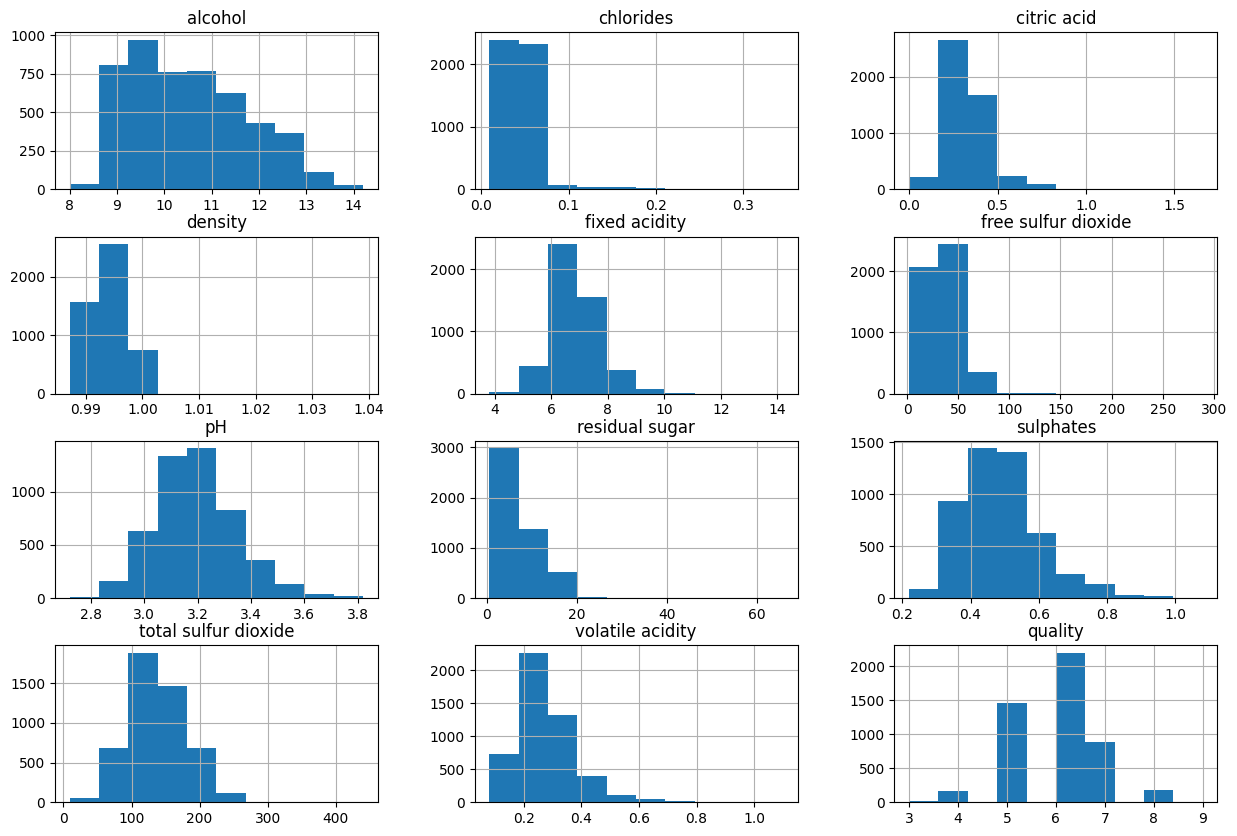

In [ ]:
df.hist(figsize=(15,10))
plt.show()

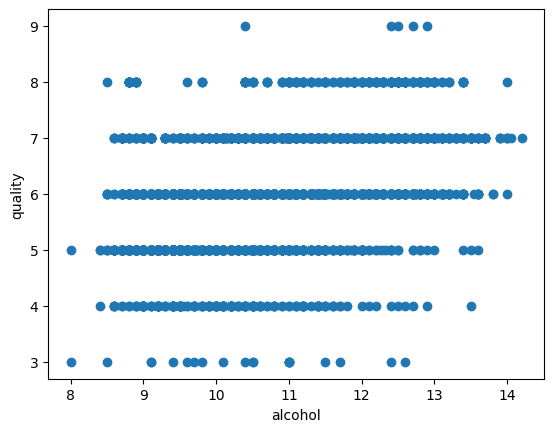

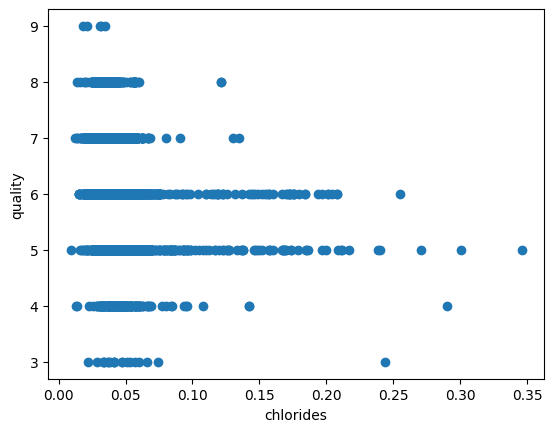

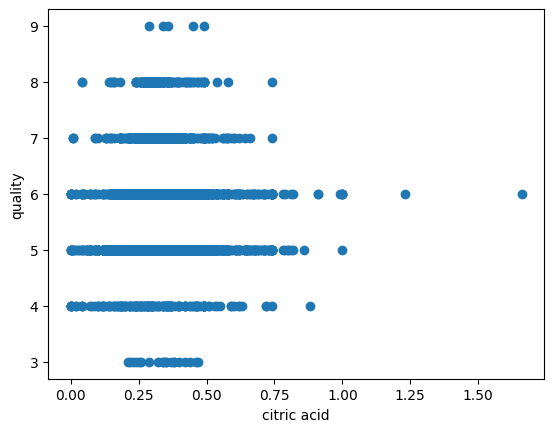

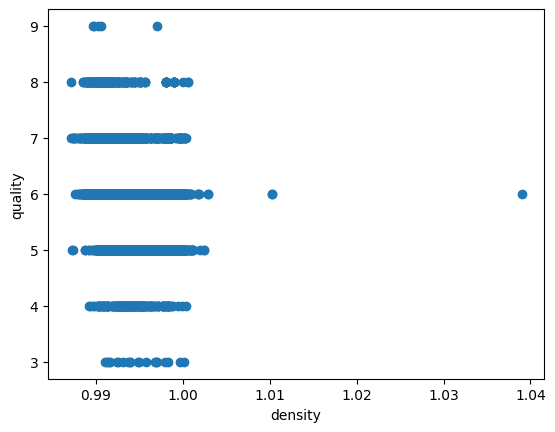

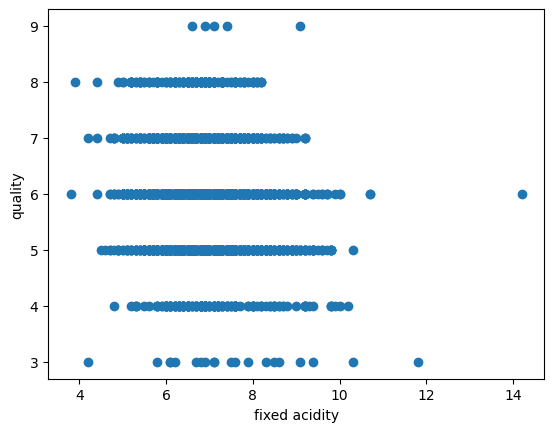

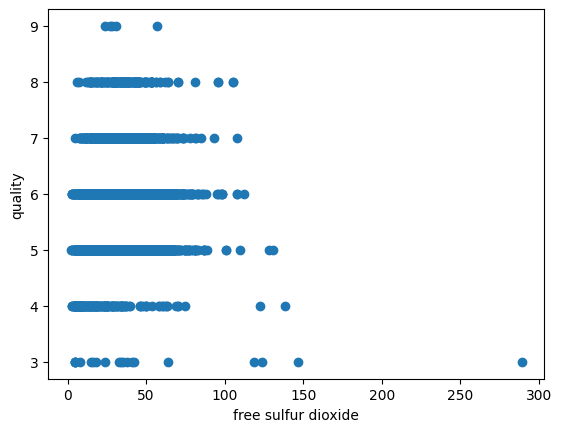

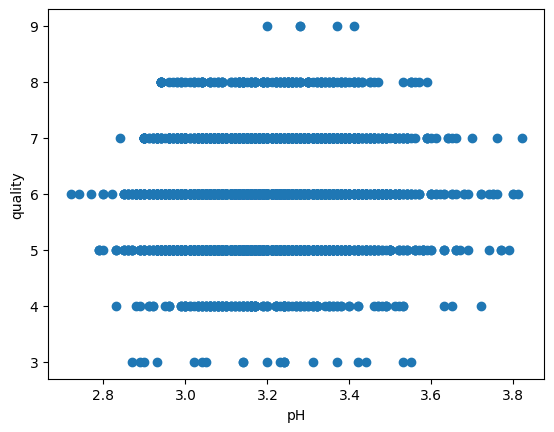

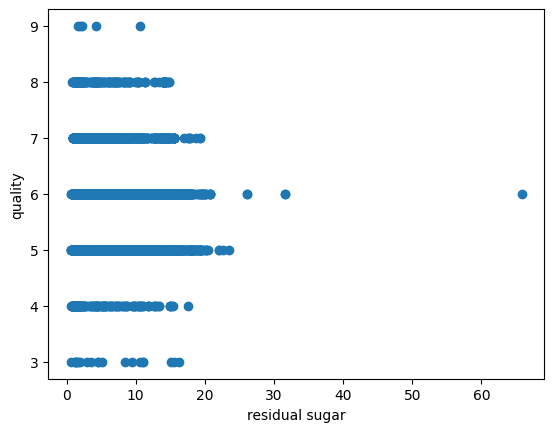

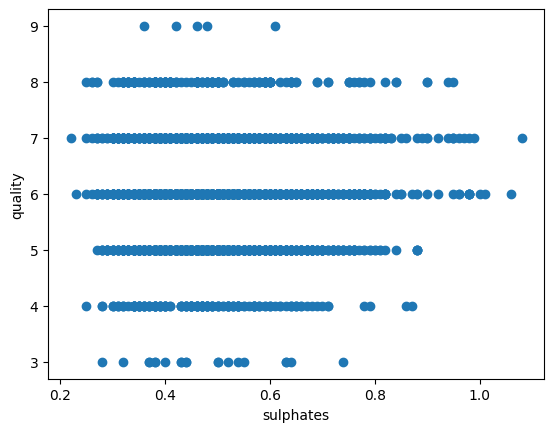

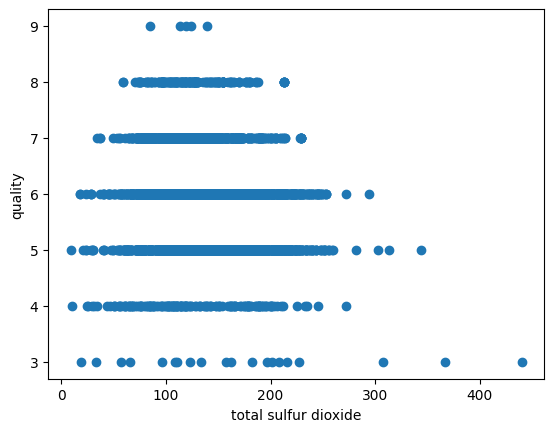

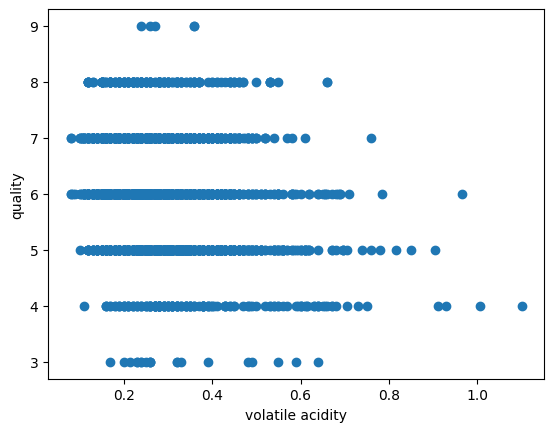

In [ ]:
for col in df.columns[:-1]:
    plt.scatter(df[col], df['quality'])
    plt.xlabel(col)
    plt.ylabel('quality')
    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df['quality'], test_size=0.2, random_state=42)


n_bootstraps = 2
bootstrap_scores = []
for i in range(n_bootstraps):
    X_boot, y_boot = resample(X_train, y_train)
    rf = RandomForestRegressor(n_estimators=200, 
                               max_depth=10,
                               min_samples_split=10,
                               min_samples_leaf=5,
                               max_features="sqrt",
                               max_samples=None)
    rf.fit(X_boot, y_boot)
    y_pred = rf.predict(X_test)
    bootstrap_scores.append(mean_squared_error(y_test, y_pred))

bootstrap_mean = np.mean(bootstrap_scores)

In [ ]:
bootstrap_mean

0.508097541424217

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the dataset
dataset = tfds.load('wine_quality', split='train')

df = tfds.as_dataframe(dataset)
df.columns = [col.replace('features/', '') for col in df.columns]


# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df['quality'], test_size=0.2, random_state=42)

# Set the number of splits and epochs
num_splits = 2
num_epochs = 2

# Initialize the KFold object
kf = KFold(n_splits=num_splits, shuffle=True)

# Initialize the list to store the mean squared error scores for each split
mse_list = []

# Loop through the splits
for train_index, test_index in kf.split(X_train):
  
  # Split the data into training and testing sets
  X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
  y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
  
  # Initialize the Random Forest Regressor
  rf = RandomForestRegressor(n_estimators=200, 
                               max_depth=10,
                               min_samples_split=10,
                               min_samples_leaf=5,
                               max_features="sqrt",
                               max_samples=None)
  
  # Fit the model on the training data
  rf.fit(X_train_kf, y_train_kf)
  
  # Make predictions on the testing data
  y_pred_kf = rf.predict(X_test_kf)
  
  # Calculate the mean squared error for this split
  mse_kf = mean_squared_error(y_test_kf, y_pred_kf)
  
  # Add the mean squared error to the list
  mse_list.append(mse_kf)

# Calculate the mean mean squared error across all splits
mse_cv = sum(mse_list)/len(mse_list)

# Print the mean mean squared error
print("Mean mean squared error:", mse_cv)


Mean mean squared error: 0.4602607791093924


In [ ]:
rf = RandomForestRegressor(n_estimators=200, 
                           max_depth=10,
                           min_samples_split=10,
                           min_samples_leaf=5,
                           max_features="sqrt",
                           max_samples=None)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
holdout_score = mean_squared_error(y_test, y_pred)
holdout_score

0.49049287206996767

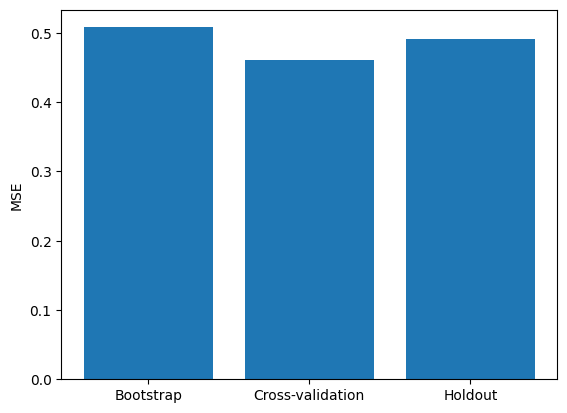

In [ ]:
import matplotlib.pyplot as plt

labels = ['Bootstrap', 'Cross-validation', 'Holdout']
values = [bootstrap_mean, mse_cv, holdout_score]


plt.bar(labels, values, capsize=10)
plt.ylabel('MSE')
plt.show()